In [1]:
import numpy as np
import math
from scipy.optimize import minimize

In [2]:
def f(x):
  y = 4*x**2 + 3*x + 6
  return(y)

fmin = minimize(f,0)
print(fmin)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.4375
        x: [-3.750e-01]
      nit: 1
      jac: [ 1.192e-07]
 hess_inv: [[1]]
     nfev: 6
     njev: 3


[2.31552293 1.17471443 0.47853555]


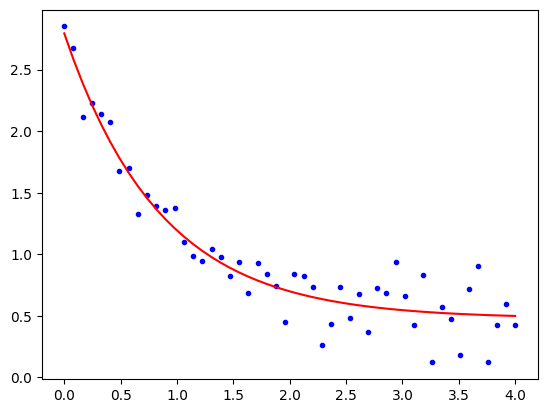

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# define a theoretical model
def model(x, a, b, c):
    return a*np.exp(-b*x) + c

# generate some experimental data. They values are randomly shifted
xdata = np.linspace(0, 4, 50)
y = model(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

# fit the experimental data to the model
popt, pcov = curve_fit(model, xdata, ydata)

# print the optimized parameters
print(popt)

# visual representation of thdata points and fitted curve
import matplotlib.pyplot as plt
plt.plot(xdata,ydata,'b.')
yfunct=model(xdata,*popt)
plt.plot(xdata,yfunct,'r-')
plt.show()


The position of the minimum is  [0.99999565 0.99999129]


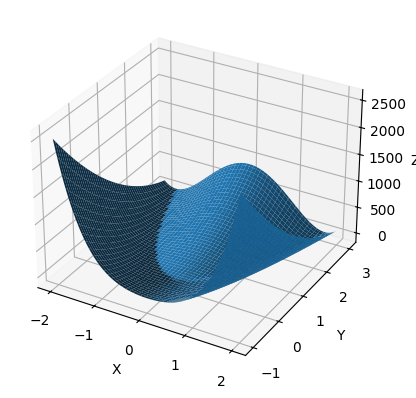

In [ ]:
from scipy.optimize import minimize
import numpy as np

# define the function to optimize
def rosenbrock(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

# define the initial guess
x0 = [2, 2]

# minimize the function
res = minimize(rosenbrock, x0)

# print the result
print("The position of the minimum is ", res.x)

# visual representation of the roenbock function
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = 100*(Y-X**2)**2 + (1-X)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.scatter(res.x[0], res.x[1], rosenbrock(res.x), c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


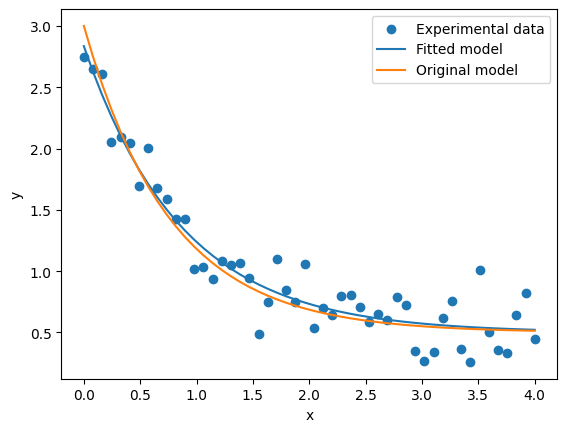

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# define a theoretical model
def model(x, a, b, c):
    return a*np.exp(-b*x) + c

# generate some experimental data
xdata = np.linspace(0, 4, 50)
y = model(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

# fit the experimental data to the model
popt, pcov = curve_fit(model, xdata, ydata)

# plot the experimental data
plt.scatter(xdata, ydata, label='Experimental data')

# plot the fitted model
plt.plot(xdata, model(xdata, *popt), label='Fitted model')

# plot the original model
plt.plot(xdata, y, label='Original model')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# calculate the R squared value
r2 = r2_score(ydata, model(xdata, *popt))
print("R-squared:", r2)


R-squared: 0.9211790397483877


In [ ]:
from scipy.optimize import minimize

def polynomial(x):
    return 4*x**4 + 7*x**3 - x**2+2*x**2+9

x0 = [2]

res = minimize(polynomial, x0)

print("Minimum value: ", res.fun)
print("At x = ", res.x)


Minimum value:  9.00000000001692
At x =  [4.1132564e-06]


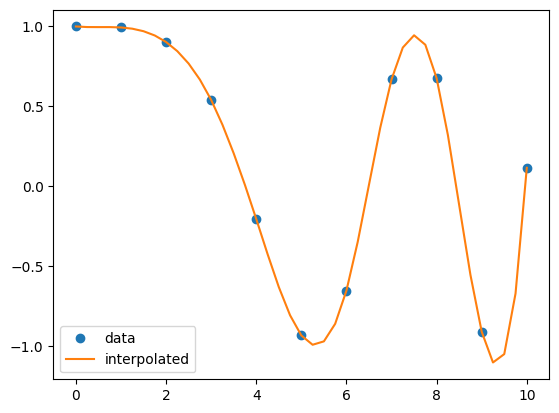

In [ ]:
from scipy.interpolate import interp1d
import numpy as np

# generate some data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

# create the interpolation function
f = interp1d(x, y, kind='cubic')

# use the interpolation function
xnew = np.linspace(0, 10, num=41, endpoint=True)
ynew = f(xnew)

# plot the original and interpolated data
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.legend(['data', 'interpolated'], loc='best')
plt.show()


## Equacions Diferencials (ODEs)
*From CodeSnippets*

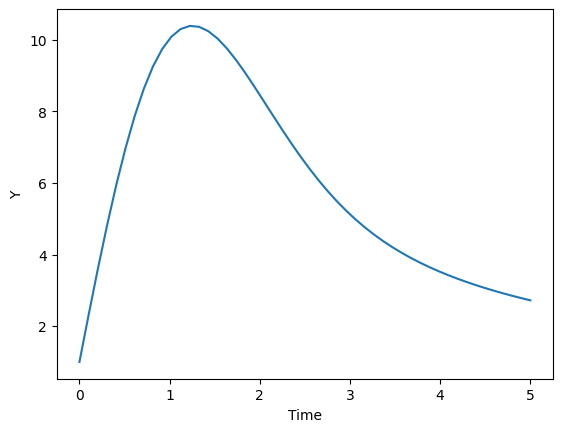

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# differential equation
def diffEq(y,t):
  dydt = -y * t + 13
  return dydt

# initial condition
y0 = 1

# values of time
t = np.linspace(0,5)

# solving ODE
y = odeint(diffEq, y0, t)

# plot results
plt.plot(t,y)
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

In [ ]:
from scipy.sparse.csc import isspmatrix_csc
from sympy import *
x, t = symbols('x,t')
f = Function('f')
dxdt = f(x).diff(x)
#diffEq = (-3*x +180)/20
#eq = Eq(dxdt, diffEq, xi=20)
eqDiff = Eq(0, 3*x -180 +20*dxdt) #la (,) es (=)

print('ODE class: ', classify_ode(eqDiff)[2])

print('Equación diferencial:')
pprint(eqDiff)

ics = {f(0): 20} #initial conditions
an_sol = dsolve(eqDiff, ics=ics) #solucion analitica
print('Solución:')
pprint(an_sol)

num_sol = lambdify(t, an_sol.rhs) #solucion numérica

t_range = [0., 0.5, 1., 1.5, 2.0]
print([num_sol(ti) for ti in t_range])

<ipython-input-22-4fb3b3215027>:1: DeprecationWarning: Please import `isspmatrix_csc` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.sparse.csc import isspmatrix_csc


ODE class:  separable
Equación diferencial:
             d             
0 = 3⋅x + 20⋅──(f(x)) - 180
             dx            
Solución:
            2           
         3⋅x            
f(x) = - ──── + 9⋅x + 20
          40            
[-0.075*x**2 + 9*x + 20, -0.075*x**2 + 9*x + 20, -0.075*x**2 + 9*x + 20, -0.075*x**2 + 9*x + 20, -0.075*x**2 + 9*x + 20]


In [ ]:
x, y, z, t = symbols('x y z t')
f = Function('f')

eq = Eq(f(t).diff(t), -2 * t * f(t))
print('ODE class: ', classify_ode(eq)[0])

an_sol = dsolve(eq, ics={f(0): 1})
pprint(an_sol)

lmbd_sol = lambdify(t, an_sol.rhs)

t_range = [0., 0.5, 1., 1.5, 2.0]
print([lmbd_sol(ti) for ti in t_range])

ODE class:  separable
          2
        -t 
f(t) = ℯ   
[1.0, 0.7788007830714049, 0.36787944117144233, 0.10539922456186433, 0.01831563888873418]




```
# This is formatted as code
```

# Càlcul simbòlic
Per a poder tractar equacions de manera simbòlica per tal de solucionar-les, podem utilitzar una llibreria anomenada SymPy.

SymPy és capaç d'operar algebraicament i coneix identitats comunes com ara $sin(x)^2+cos(x)^2=1$, però abans de continuar fent àlgebra a SymPy, hem de cobrir alguns mètodes algebraics bàsics. Aquests es proporcionen a la següent taula que inclou l'expansió i factorització polinòmica, la simplificació d'expressions i la resolució d'equacions. Els apartats següents mostren cadascun d'ells.

| Mètode | Descripció |
|:------:|:----------  |
|`sympy.expand()` | Amplia polinomis |
|`sympy.factor()` | Factoritza polinomis |
|`sympy.simplify()` | Simplifica expressions |
|`sympy.solve()` | Iguala l'expressió a zero i resol la variable sol·licitada |

## Expansió polinomial i factorització

Quan es tracta de polinomis, l'expansió i la factorització són operacions habituals que poden ser tediosos i que requereixen temps a mà. SymPy fa que siguin ràpids i fàcils. Per exemple, podem ampliar l'expressió $(x-1)(3x+2)$ com es demostra a continuació.

In [ ]:
import sympy

x = sympy.symbols('x')

In [ ]:
expr = (x - 1)*(3*x + 2)

sympy.expand(expr)

3*x**2 - x - 2

El procés es pot invertir factoritzant el polinomi.

In [ ]:
sympy.factor(3*x**2 - x - 2)

(x - 1)*(3*x + 2)

## Simplificació

És possible que SymPy no retorni sempre una expressió matemàtica en la forma més simple. A continuació es mostra una expressió amb una forma més senzilla, i si la introduïm a SymPy, no es simplifica automàticament.

In [ ]:
3*x**2 - 4*x - 15 / (x - 3)

3*x**2 - 4*x - 15/(x - 3)

Tanmateix, si li indiquem a SymPy que simplifiqui l'expressió mitjançant el mètode `simplify()`, farà un millor intent de trobar una forma més senzilla.

In [ ]:
sympy.simplify((3*x**2 - 4*x - 15) / (x - 3))

3*x + 5

## Resolució d'equacions

SymPy també pot resoldre equacions d'una variable desconeguda mitjançant la funció solve(). La funció requereix una única expressió igual a zero. Per exemple, el següent resol per $x$ en $x^2+1.4x-5.76=0$.

In [ ]:
sympy.solve(x**2 + 1.4*x - 5.76)

[-3.20000000000000, 1.80000000000000]

### Exemple (taula d'equilibri)

Una aplicació química comuna de les operacions algebraiques anteriors és resoldre problemes d'equilibri mitjançant el mètode ICE (Initial, Change, and Equilibrium). Com a penúltim pas, les expressions matemàtiques s'insereixen a l'expressió d'equilibri i sovint donen lloc a una equació polinòmica. A continuació es mostra un exemple de problema amb la taula ICE completada i l'expressió d'equilibri.

|     | 2 NH$_3$ | $\rightleftharpoons$ | 3 H$_2$ (g) | + | N$_2$ (g) |
|:--: | :--:  |:-:|:-------: |:--:|:-----|
|Inicial| 0.60 M |  | 0.60 M |  | 0.80 M |
|Variació, $\Delta$| -2x |  |  +3x   |  |  +x    |
|Equilibri| 0.60 - 2x | | 0.60 + 3x |  | 0.80 + x |

$$K_c = 3.44 = \frac{[N_2][H_2]^3}{[NH_3]^2} = \frac{(0.80 + x)(0.60 + 3x)^3}{(0.60 - 2x)^2}$$

Per ampliar la part dreta de l'equació, podem utilitzar el mètode `expand()`.

In [ ]:
expr = (0.80 + x) * (0.60 + 3*x)**3 / (0.60 - 2*x)**2

sympy.expand(expr)

27*x**4/(4*x**2 - 2.4*x + 0.36) + 37.8*x**3/(4*x**2 - 2.4*x + 0.36) + 16.2*x**2/(4*x**2 - 2.4*x + 0.36) + 2.808*x/(4*x**2 - 2.4*x + 0.36) + 0.1728/(4*x**2 - 2.4*x + 0.36)

Això probablement no és el que esperavem. El polinomi s'ha ampliat per al numerador i el denominador, però el resultat encara és una fracció. Podem indicar a SymPy que simplifiqui els resultats.

In [ ]:
sympy.simplify(sympy.expand(expr))

(27*x**4 + 37.8*x**3 + 16.2*x**2 + 2.808*x + 0.1728)/(4*x**2 - 2.4*x + 0.36)

Això és molt millor. En definitiva, volem resoldre per $x$, però la funció `solve()` requereix una expressió que sigui igual a zero. Ho podem aconseguir restant 3.44.

In [ ]:
sympy.solve(expr - 3.44)

[-1.52752978294276,
 0.0916567216237442,
 0.0179365306595075 - 0.530628104891225*I,
 0.0179365306595075 + 0.530628104891225*I]

# Calculus

SymPy i SciPy contenen funcionalitats per realitzar operacions de càlcul. Començarem amb SymPy per a les matemàtiques simbòliques i canviarem a SciPy per al treball estrictament numèric més endevant. En aquesta secció, treballarem amb les funcions de densitat radial (\\(\Psi\\)) per als orbitals atòmics d'hidrogen. Els quadrats d'aquestes funcions (\\(\Psi^2\\)) proporcionen la probabilitat de trobar un electró respecte a la distància del nucli. Tot i que aquestes equacions estan disponibles en diversos llibres de text, SymPy proporciona un mòdul de física amb una funció `R_nl()` per generar aquestes equacions basades en el nombre quàntic principal (*n*), el nombre quàntic angular (*l*) i nombre atòmic (*Z*). Per exemple, per generar la funció de l'orbital 2p d'hidrogen, *n = 2, l = 1* i *Z = 1*.

In [ ]:
from sympy.physics.hydrogen import R_nl
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
r = sympy.symbols('r')
R_21 = R_nl(2, 1, r, Z=1)

In [ ]:
R_21

sqrt(6)*r*exp(-r/2)/12

Això proporciona l'equació de la funció d'ona respecte al radi, *r*. També la podem convertir en una funció de Python mitjançant el mètode `sympy.lambdify()`.

In [ ]:
f = sympy.lambdify(r, R_21, modules='numpy')

Aquesta funció ara es pot cridar proporcionant un valor per a *r*.

In [ ]:
f(0.5)

0.07948602207520471

## Diferenciació

SymPy pot agafar la derivada de l'expressió matemàtica utilitzant la funció `sympy.diff()`. Aquesta funció requereix una expressió matemàtica, la variable respecte a la derivada de la qual es pren i el grau. El comportament per defecte és prendre la primera derivada si no s'especifica cap grau.

Com a problema d'exemple, el radi de densitat màxima es pot trobar prenent la primera derivada de l'equació radial i resolent el pendent zero.

In [ ]:
dR_21 = sympy.diff(R_21, r, 1)
dR_21

-sqrt(6)*r*exp(-r/2)/24 + sqrt(6)*exp(-r/2)/12

In [ ]:
mx = float(sympy.solve(dR_21)[0])

La funció `solve()` retorna una matriu, de manera que l'hem d'indexar per obtenir el valor únic. Podem representar la densitat radial i el punt de densitat màxima per veure si va funcionar.

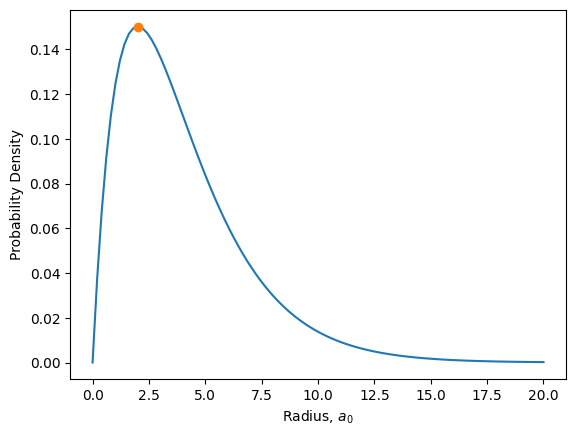

In [ ]:
R = np.linspace(0,20,100)
plt.plot(R, f(R))
plt.plot(mx, f(mx), 'o')
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density')
plt.show()

El radi és a Bohrs (\\(a_0\\)) que és igual a aproximadament 0,53 angstroms.

## Integració de funcions
SymPy també pot integrar expressions utilitzant la funció `sympy.integrate()` que pren l'expressió matemàtica i la variable més el rang d'integració en forma de tupla. Si s'omet l'interval d'integració, SymPy retornarà una expressió simbòlica.

La funció de densitat normalitzada (és a dir, totals a un) són els temps de la funció d'ona quadrada \\(r^2\\) (és a dir, \\(\psi^2r^2\\)). Podem utilitzar-ho per determinar la probabilitat de trobar un electró en un rang determinat de distàncies des del radi. A continuació, integrem des del nucli fins al radi de màxima densitat.

In [ ]:
sympy.integrate(R_21**2 * r**2, (r,0, mx)).evalf()

0.0526530173437111

Hi ha una probabilitat del 5,27% de trobar un electró entre el nucli i el radi de màxima probabilitat. Probablement això sigui una mica sorprenent, però l'examen de la trama de densitat radial revela que el radi de màxima probabilitat és bastant a prop del nucli amb una quantitat significativa de densitat més enllà del radi màxim. Vegem la probabilitat de trobar un electró entre 0 i 10 Bohrs del nucli.

In [ ]:
sympy.integrate(R_21**2 * r**2, (r,0,10)).evalf()

0.970747311923039

Hi ha un 97,1% de probabilitats de trobar l'electró entre 0 i 10 angstroms.

# Diferenciació i integració simbòlica

In [ ]:
import numpy as np
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp

x = sp.symbols('x')

func = sp.sin(sp.cos(sp.tan(x)))
deri = sp.diff(func,x)
display(deri)

 ⎛   2       ⎞                             
-⎝tan (x) + 1⎠⋅sin(tan(x))⋅cos(cos(tan(x)))

In [ ]:
import numpy as np
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp

x = sp.symbols('x')

func = sp.sin(sp.cos(sp.tan(x)))
inte = sp.integrate(func,(x,0,1))
display(inte)

1                    
⌠                    
⎮ sin(cos(tan(x))) dx
⌡                    
0                    

In [ ]:
sp.integrate(sp.sin(x),(x,0,1))

1 - cos(1)

In [ ]:
from sympy import cos,pi

sp.integrate(cos(x), (x,0,pi/2.0))

1

In [ ]:
sp.integrate(x, (x,0,5))

25/2